# Lab 07.01 - Knock Weather

*by Eoghan Walsh*

In [56]:
# Import the python modules.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [57]:
# Import the data.
knock_df = pd.read_csv("https://cli.fusio.net/cli/climate_data/webdata/mly4935.csv", skiprows=19)

print(knock_df.head())

   year  month  meant maxtp mintp  mnmax  mnmin   rain  gmin wdsp maxgt   sun
0  1996      8   13.4  20.4   7.3   16.6   10.3  109.4   5.3  8.3    34      
1  1996     10    9.7               12.5    7.0                              
2  1996     11    5.0                7.6    2.5                              
3  1996     12    3.1  10.7  -4.0    5.2    1.1         -5.3  9.4    48      
4  1997      1    3.4  10.7  -3.9    5.2    1.6   26.0  -5.2  8.0    40  42.1


0.2610020102262302


Text(0.5, 1.0, 'Knock Airport Mean Temperature')

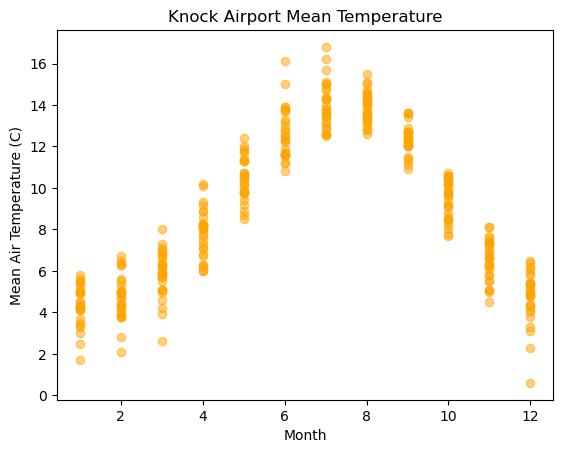

In [67]:
# Correlation between temperature and month.
corr_temp = knock_df["month"].corr(knock_df["meant"])

print(corr_temp)

# Plot
x = knock_df["month"]
y = knock_df["meant"]

fig, ax = plt.subplots()

ax.scatter(x, y, color="orange", alpha=0.5)

ax.set_xlabel("Month")
ax.set_ylabel("Mean Air Temperature (C)")
ax.set_title("Knock Airport Mean Temperature")

In [59]:
# Correlation between windspeed and month.
windspeed_df = knock_df[["month", "wdsp"]]

windspeed_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 338 entries, 0 to 337
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   month   338 non-null    int64 
 1   wdsp    338 non-null    object
dtypes: int64(1), object(1)
memory usage: 5.4+ KB


In [ ]:
# Clean wind speed data.
windspeed_clean = windspeed_df.replace(" ", np.nan).dropna()

windspeed_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 336 entries, 0 to 337
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   month   336 non-null    int64 
 1   wdsp    336 non-null    object
dtypes: int64(1), object(1)
memory usage: 7.9+ KB


In [63]:
# Convert wind speed data dtype to float.
windspeed_clean["wdsp"] = windspeed_clean["wdsp"].astype(float)

windspeed_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 336 entries, 0 to 337
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   month   336 non-null    int64  
 1   wdsp    336 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 7.9 KB


-0.19999237419389984


Text(0.5, 1.0, 'Knock Airport Mean Wind Speed')

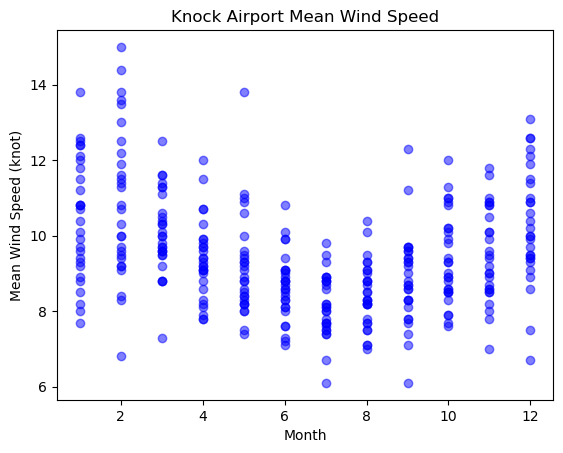

In [69]:
# Correlation between wind speed and month.
corr_windspeed = windspeed_clean["month"].corr(windspeed_clean["wdsp"])

print(corr_windspeed)

# Plot
x = windspeed_clean["month"]
y = windspeed_clean["wdsp"]

fig, ax = plt.subplots()

ax.scatter(x, y, color="blue", alpha=0.5)

ax.set_xlabel("Month")
ax.set_ylabel("Mean Wind Speed (knot)")
ax.set_title("Knock Airport Mean Wind Speed")

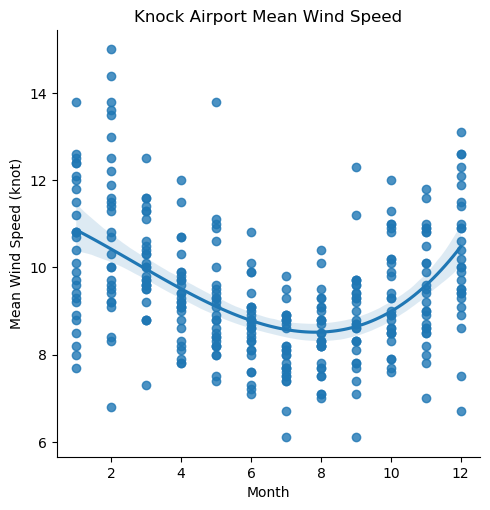

In [107]:
# Add regression line in seaborn.
title = "Knock Airport Mean Wind Speed"
xlabel = "Month"
ylabel = "Mean Wind Speed (knot)"

sns.lmplot(x="month", y="wdsp", order=3, data=windspeed_clean).set(title=title, xlabel=xlabel, ylabel=ylabel)


***
## End